In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from joblib import dump
from sklearn.mixture import GaussianMixture
from sklearn.metrics import (
    calinski_harabasz_score,
    davies_bouldin_score,
    silhouette_samples,
    silhouette_score,
)

In [2]:
df = pd.read_csv("../../../Datasets/ClusterPoints.csv")
df.head()

,X,Y
0,33,43
1,48,10
2,15,32
3,41,16
4,47,11


In [3]:
silhouette = []
calinski_harabasz = []
davies_bouldin = []
silhouette_s = []
for k in range(2, 11):
    gm = GaussianMixture(n_components=k)
    cluster_labels = gm.fit_predict(df)
    silhouette.append(silhouette_score(df, cluster_labels))
    calinski_harabasz.append(calinski_harabasz_score(df, cluster_labels))
    davies_bouldin.append(davies_bouldin_score(df, cluster_labels))
    silhouette_s.append(silhouette_samples(df, cluster_labels))

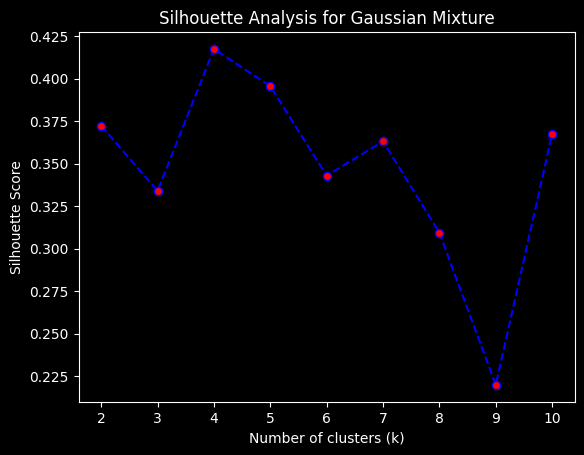

In [4]:
plt.plot(
    range(2, 11),
    silhouette,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for Gaussian Mixture")
plt.show()

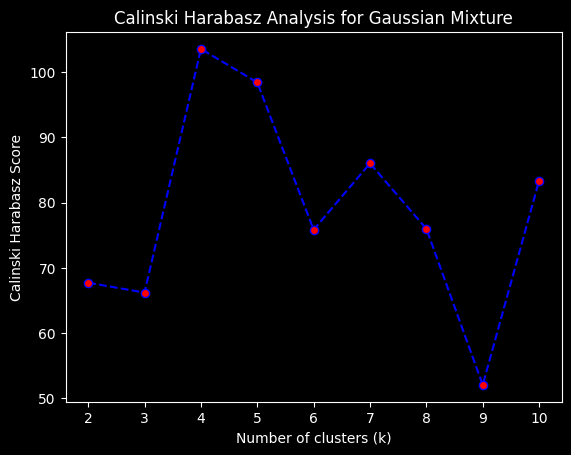

In [5]:
plt.plot(
    range(2, 11),
    calinski_harabasz,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Calinski Harabasz Score")
plt.title("Calinski Harabasz Analysis for Gaussian Mixture")
plt.show()

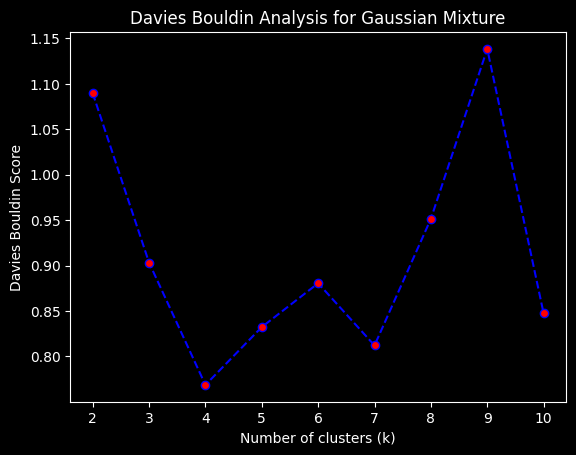

In [6]:
plt.plot(
    range(2, 11),
    davies_bouldin,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Davies Bouldin Score")
plt.title("Davies Bouldin Analysis for Gaussian Mixture")
plt.show()

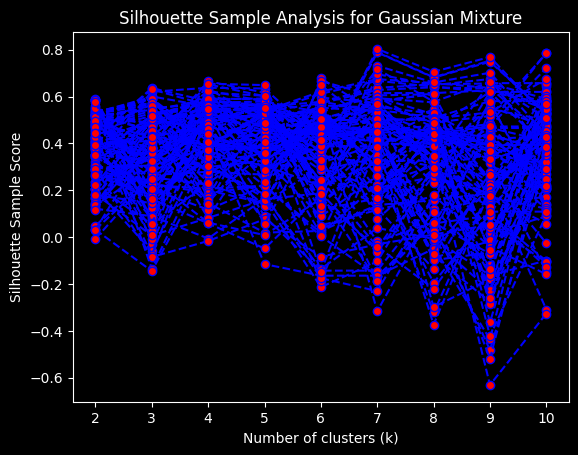

In [7]:
plt.plot(
    range(2, 11),
    silhouette_s,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Sample Score")
plt.title("Silhouette Sample Analysis for Gaussian Mixture")
plt.show()

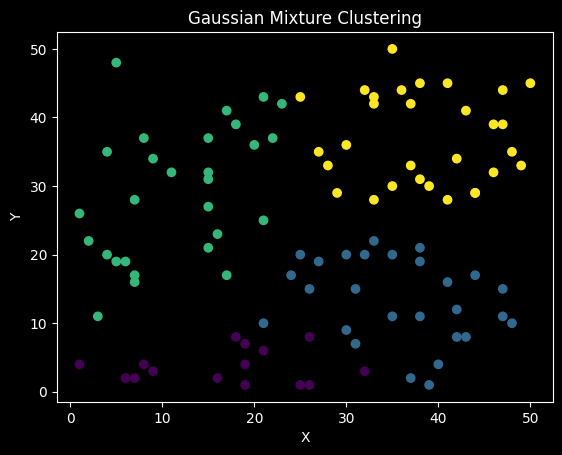

In [8]:
gm = GaussianMixture(n_components=4)
cluster_labels = gm.fit_predict(df)
plt.scatter(df["X"], df["Y"], c=cluster_labels)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Gaussian Mixture Clustering")
plt.show()

In [9]:
print("Silhouette Score :", silhouette_score(df, cluster_labels))
print("Calinski Harabasz Score :", calinski_harabasz_score(df, cluster_labels))
print("Davies Bouldin Score :", davies_bouldin_score(df, cluster_labels))
print("Silhouette Samples :", silhouette_samples(df, cluster_labels))

Silhouette Score : 0.3979956757879868
Calinski Harabasz Score : 92.47909403095669
Davies Bouldin Score : 0.7640129570581099
Silhouette Samples : [ 0.5616064   0.5041552   0.53859178  0.53261757  0.51729874  0.17227078
  0.54640536  0.61870158  0.23714019  0.38615275  0.29239977  0.46463659
  0.60566752  0.57728307  0.1955876   0.65148354  0.56764301  0.21195424
  0.60316689  0.59450106  0.35594179  0.63826311  0.36877232  0.46160001
  0.55432999  0.23631571  0.64085636 -0.17443211  0.32314256  0.5468935
  0.53108644  0.59912742  0.56181344  0.46059889  0.52502431  0.53836314
  0.37099588  0.55872924  0.42167953  0.38593955 -0.07295766  0.59507326
  0.55365267  0.57965453  0.27909775  0.46884964  0.33058137  0.11216534
  0.42874469  0.4992546   0.45180663  0.27278455  0.44306912  0.53157853
  0.55371313  0.59229238  0.28008868  0.52775508  0.30966954  0.51839604
  0.15095481  0.6365416  -0.06482831  0.41472166  0.52074647  0.44170101
  0.08925103  0.21570366  0.5985745   0.27658001  0.3

In [10]:
dump(gm, "../../../Models/gaussianMixture.joblib")

['../../../Models/gaussianMixture.joblib']